In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\GARGI\Desktop\project\M\final dataset1.csv')

In [3]:
data.shape

(378867, 12)

In [4]:
data.duplicated().sum()

4009

In [5]:
data = data.drop_duplicates() ; data

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Departure Time,Total_stops,Arrival Time,Duration,Days_left,Fare
0,15/01/2023,16/01/2023,Monday,SpiceJet,SG-8169,Economy,20:00\nDelhi,non-stop,22:05\nMumbai,2.0833,1,5335
1,15/01/2023,16/01/2023,Monday,Indigo,6E-2519,Economy,23:00\nDelhi,non-stop,01:20\nMumbai,2.3333,1,5899
2,15/01/2023,16/01/2023,Monday,GO FIRST,G8-354,Economy,22:30\nDelhi,non-stop,00:40\nMumbai,2.1667,1,5801
3,15/01/2023,16/01/2023,Monday,SpiceJet,SG-8709,Economy,18:50\nDelhi,non-stop,20:55\nMumbai,2.0833,1,5794
4,15/01/2023,16/01/2023,Monday,Air India,AI-805,Economy,20:00\nDelhi,non-stop,22:10\nMumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
378860,15/01/2023,06/03/2023,Monday,Vistara,UK-918,Business,05:05\nAhmedabad,1-stop,16:20\nChennai,11.2500,50,61302
378861,15/01/2023,06/03/2023,Monday,Vistara,UK-946,Business,08:40\nAhmedabad,1-stop,19:50\nChennai,11.1667,50,65028
378862,15/01/2023,06/03/2023,Monday,Vistara,UK-926,Business,06:45\nAhmedabad,1-stop,19:50\nChennai,13.0833,50,65028
378863,15/01/2023,06/03/2023,Monday,Vistara,UK-918,Business,05:05\nAhmedabad,1-stop,16:20\nChennai,11.2500,50,69254


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374858 entries, 0 to 378865
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date of Booking  374858 non-null  object 
 1   Date_of_journey  374858 non-null  object 
 2   Journey_day      374858 non-null  object 
 3   Airline          374858 non-null  object 
 4   Flight_code      374858 non-null  object 
 5   Class            374858 non-null  object 
 6   Departure Time   374858 non-null  object 
 7   Total_stops      374858 non-null  object 
 8   Arrival Time     374858 non-null  object 
 9   Duration         374858 non-null  float64
 10  Days_left        374858 non-null  int64  
 11  Fare             374858 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 37.2+ MB


# deal with missing values

In [7]:
#data.info()

So there is no missing value


# Data Pre-process & extract Derived attributes from "Date_of_Journey"

In [8]:
data[['Dep_Time', 'Source']] = data['Departure Time'].str.split('\n', expand=True)

data[['Arrival_Time', 'Destination']] = data['Arrival Time'].str.split('\n', expand=True)


In [9]:
category=['Journey_day','Airline','Class','Source','Total_stops','Destination']
#checking for uniques values
for i in category:
    print(i,data[i].unique())
    print('-------------------------------------------------------------------------------------------')

Journey_day ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
-------------------------------------------------------------------------------------------
Airline ['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'AirAsia' 'Vistara' 'AkasaAir'
 'AllianceAir' 'StarAir']
-------------------------------------------------------------------------------------------
Class ['Economy' 'Business']
-------------------------------------------------------------------------------------------
Source ['Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Ahmedabad']
-------------------------------------------------------------------------------------------
Total_stops ['non-stop' '1-stop' '2+-stop']
-------------------------------------------------------------------------------------------
Destination ['Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Ahmedabad' 'Delhi']
-------------------------------------------------------------------------------------------


In [10]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [11]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
data.columns

Index(['Date of Booking', 'Date_of_journey', 'Journey_day', 'Airline',
       'Flight_code', 'Class', 'Departure Time', 'Total_stops', 'Arrival Time',
       'Duration', 'Days_left', 'Fare', 'Dep_Time', 'Source', 'Arrival_Time',
       'Destination'],
      dtype='object')

In [13]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_journey']:
    change_into_Datetime(feature)

In [14]:
data.head(2)

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Departure Time,Total_stops,Arrival Time,Duration,Days_left,Fare,Dep_Time,Source,Arrival_Time,Destination
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,20:00\nDelhi,non-stop,22:05\nMumbai,2.0833,1,5335,2024-05-16 20:00:00,Delhi,2024-05-16 22:05:00,Mumbai
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,23:00\nDelhi,non-stop,01:20\nMumbai,2.3333,1,5899,2024-05-16 23:00:00,Delhi,2024-05-16 01:20:00,Mumbai


In [15]:
data.dtypes

Date of Booking            object
Date_of_journey    datetime64[ns]
Journey_day                object
Airline                    object
Flight_code                object
Class                      object
Departure Time             object
Total_stops                object
Arrival Time               object
Duration                  float64
Days_left                   int64
Fare                        int64
Dep_Time           datetime64[ns]
Source                     object
Arrival_Time       datetime64[ns]
Destination                object
dtype: object

In [16]:
data["Journey_date"] = data['Date_of_journey'].dt.day
data["Journey_month"] = data['Date_of_journey'].dt.month
data["Journey_year"] = data['Date_of_journey'].dt.year

In [17]:
data.head(3)

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Departure Time,Total_stops,Arrival Time,Duration,Days_left,Fare,Dep_Time,Source,Arrival_Time,Destination,Journey_date,Journey_month,Journey_year
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,20:00\nDelhi,non-stop,22:05\nMumbai,2.0833,1,5335,2024-05-16 20:00:00,Delhi,2024-05-16 22:05:00,Mumbai,16,1,2023
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,23:00\nDelhi,non-stop,01:20\nMumbai,2.3333,1,5899,2024-05-16 23:00:00,Delhi,2024-05-16 01:20:00,Mumbai,16,1,2023
2,15/01/2023,2023-01-16,Monday,GO FIRST,G8-354,Economy,22:30\nDelhi,non-stop,00:40\nMumbai,2.1667,1,5801,2024-05-16 22:30:00,Delhi,2024-05-16 00:40:00,Mumbai,16,1,2023


In [18]:
def extract_hour_min(df , col):
    data[col+"_hour"] = data[col].dt.hour
    data[col+"_minute"] = data[col].dt.minute
    return data.head(3)

In [19]:
extract_hour_min(data , "Dep_Time")

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Departure Time,Total_stops,Arrival Time,Duration,...,Fare,Dep_Time,Source,Arrival_Time,Destination,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,20:00\nDelhi,non-stop,22:05\nMumbai,2.0833,...,5335,2024-05-16 20:00:00,Delhi,2024-05-16 22:05:00,Mumbai,16,1,2023,20,0
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,23:00\nDelhi,non-stop,01:20\nMumbai,2.3333,...,5899,2024-05-16 23:00:00,Delhi,2024-05-16 01:20:00,Mumbai,16,1,2023,23,0
2,15/01/2023,2023-01-16,Monday,GO FIRST,G8-354,Economy,22:30\nDelhi,non-stop,00:40\nMumbai,2.1667,...,5801,2024-05-16 22:30:00,Delhi,2024-05-16 00:40:00,Mumbai,16,1,2023,22,30


In [20]:
extract_hour_min(data , "Arrival_Time")

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Departure Time,Total_stops,Arrival Time,Duration,...,Source,Arrival_Time,Destination,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,20:00\nDelhi,non-stop,22:05\nMumbai,2.0833,...,Delhi,2024-05-16 22:05:00,Mumbai,16,1,2023,20,0,22,5
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,23:00\nDelhi,non-stop,01:20\nMumbai,2.3333,...,Delhi,2024-05-16 01:20:00,Mumbai,16,1,2023,23,0,1,20
2,15/01/2023,2023-01-16,Monday,GO FIRST,G8-354,Economy,22:30\nDelhi,non-stop,00:40\nMumbai,2.1667,...,Delhi,2024-05-16 00:40:00,Mumbai,16,1,2023,22,30,0,40


In [21]:
cols_to_drop = ['Arrival Time' , "Departure Time","Dep_Time","Arrival_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [22]:
data.head(2)

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Total_stops,Duration,Days_left,Fare,Source,Destination,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,non-stop,2.0833,1,5335,Delhi,Mumbai,16,1,2023,20,0,22,5
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,non-stop,2.3333,1,5899,Delhi,Mumbai,16,1,2023,23,0,1,20


In [23]:
data.shape

(374858, 19)

##### 1. when will most of the flights take-off

In [24]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

In [25]:
data['depart'] = data['Dep_Time_hour'].apply(flight_dep_time)

In [26]:
depart = data['Dep_Time_hour'].apply(flight_dep_time)

<Axes: xlabel='Dep_Time_hour'>

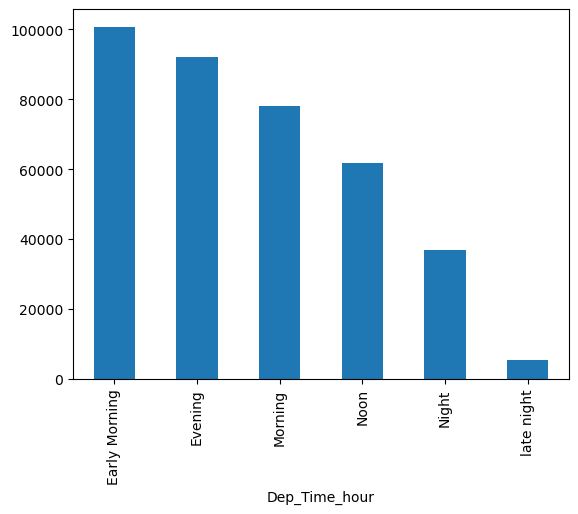

In [27]:
depart.value_counts().plot(kind="bar")

In [28]:
Arrival= data['Arrival_Time_hour'].apply(flight_dep_time)

In [29]:
data['Arrival']= data['Arrival_Time_hour'].apply(flight_dep_time)

<Axes: xlabel='Arrival_Time_hour'>

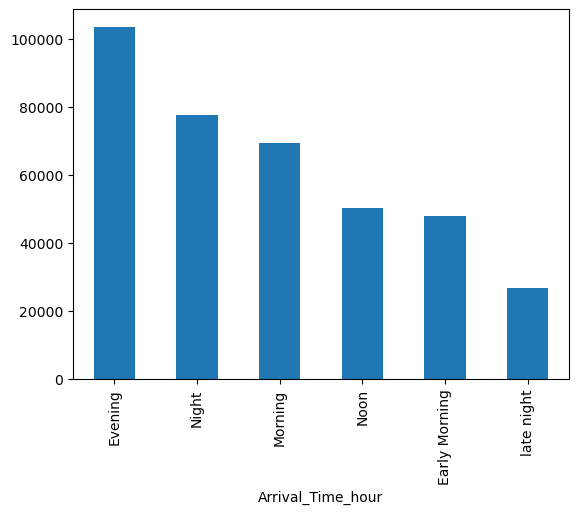

In [30]:
Arrival.value_counts().plot(kind="bar")

In [31]:
data.head(2)

,Date of Booking,Date_of_journey,Journey_day,Airline,Flight_code,Class,Total_stops,Duration,Days_left,Fare,...,Destination,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,depart,Arrival
0,15/01/2023,2023-01-16,Monday,SpiceJet,SG-8169,Economy,non-stop,2.0833,1,5335,...,Mumbai,16,1,2023,20,0,22,5,Evening,Night
1,15/01/2023,2023-01-16,Monday,Indigo,6E-2519,Economy,non-stop,2.3333,1,5899,...,Mumbai,16,1,2023,23,0,1,20,Night,late night


In [32]:
columns_to_drop = ['Date of Booking','Date_of_journey','Dep_Time_minute','Arrival_Time_minute','Journey_year','Journey_month','Flight_code']
df= data.drop(columns=columns_to_drop)


In [33]:
df.head(2)

,Journey_day,Airline,Class,Total_stops,Duration,Days_left,Fare,Source,Destination,Journey_date,Dep_Time_hour,Arrival_Time_hour,depart,Arrival
0,Monday,SpiceJet,Economy,non-stop,2.0833,1,5335,Delhi,Mumbai,16,20,22,Evening,Night
1,Monday,Indigo,Economy,non-stop,2.3333,1,5899,Delhi,Mumbai,16,23,1,Night,late night


In [34]:
data.describe()

,Date_of_journey,Duration,Days_left,Fare,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
count,374858,374858.000000,374858.000000,374858.000000,374858.000000,374858.000000,374858.0,374858.000000,374858.00000,374858.000000,374858.000000
mean,2023-02-09 16:41:43.475982592,11.692139,25.695642,24161.885447,16.015537,1.807834,2023.0,13.087484,25.45660,14.682072,28.762182
min,2023-01-16 00:00:00,0.750000,1.000000,1307.000000,1.000000,1.000000,2023.0,0.000000,0.00000,0.000000,0.000000
25%,2023-01-28 00:00:00,6.333300,13.000000,8234.000000,7.000000,1.000000,2023.0,8.000000,10.00000,9.000000,15.000000
50%,2023-02-10 00:00:00,10.666700,26.000000,12795.000000,17.000000,2.000000,2023.0,13.000000,25.00000,16.000000,30.000000
75%,2023-02-22 00:00:00,15.750000,38.000000,42716.000000,24.000000,2.000000,2023.0,18.000000,40.00000,20.000000,45.000000
max,2023-03-06 00:00:00,43.583300,50.000000,143019.000000,31.000000,3.000000,2023.0,23.000000,55.00000,23.000000,59.000000
std,NaN,7.059368,14.292306,21786.798093,9.086543,0.630135,0.0,5.504635,17.29137,6.400876,18.215884


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374858 entries, 0 to 378865
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date of Booking      374858 non-null  object        
 1   Date_of_journey      374858 non-null  datetime64[ns]
 2   Journey_day          374858 non-null  object        
 3   Airline              374858 non-null  object        
 4   Flight_code          374858 non-null  object        
 5   Class                374858 non-null  object        
 6   Total_stops          374858 non-null  object        
 7   Duration             374858 non-null  float64       
 8   Days_left            374858 non-null  int64         
 9   Fare                 374858 non-null  int64         
 10  Source               374858 non-null  object        
 11  Destination          374858 non-null  object        
 12  Journey_date         374858 non-null  int32         
 13  Journey_month      

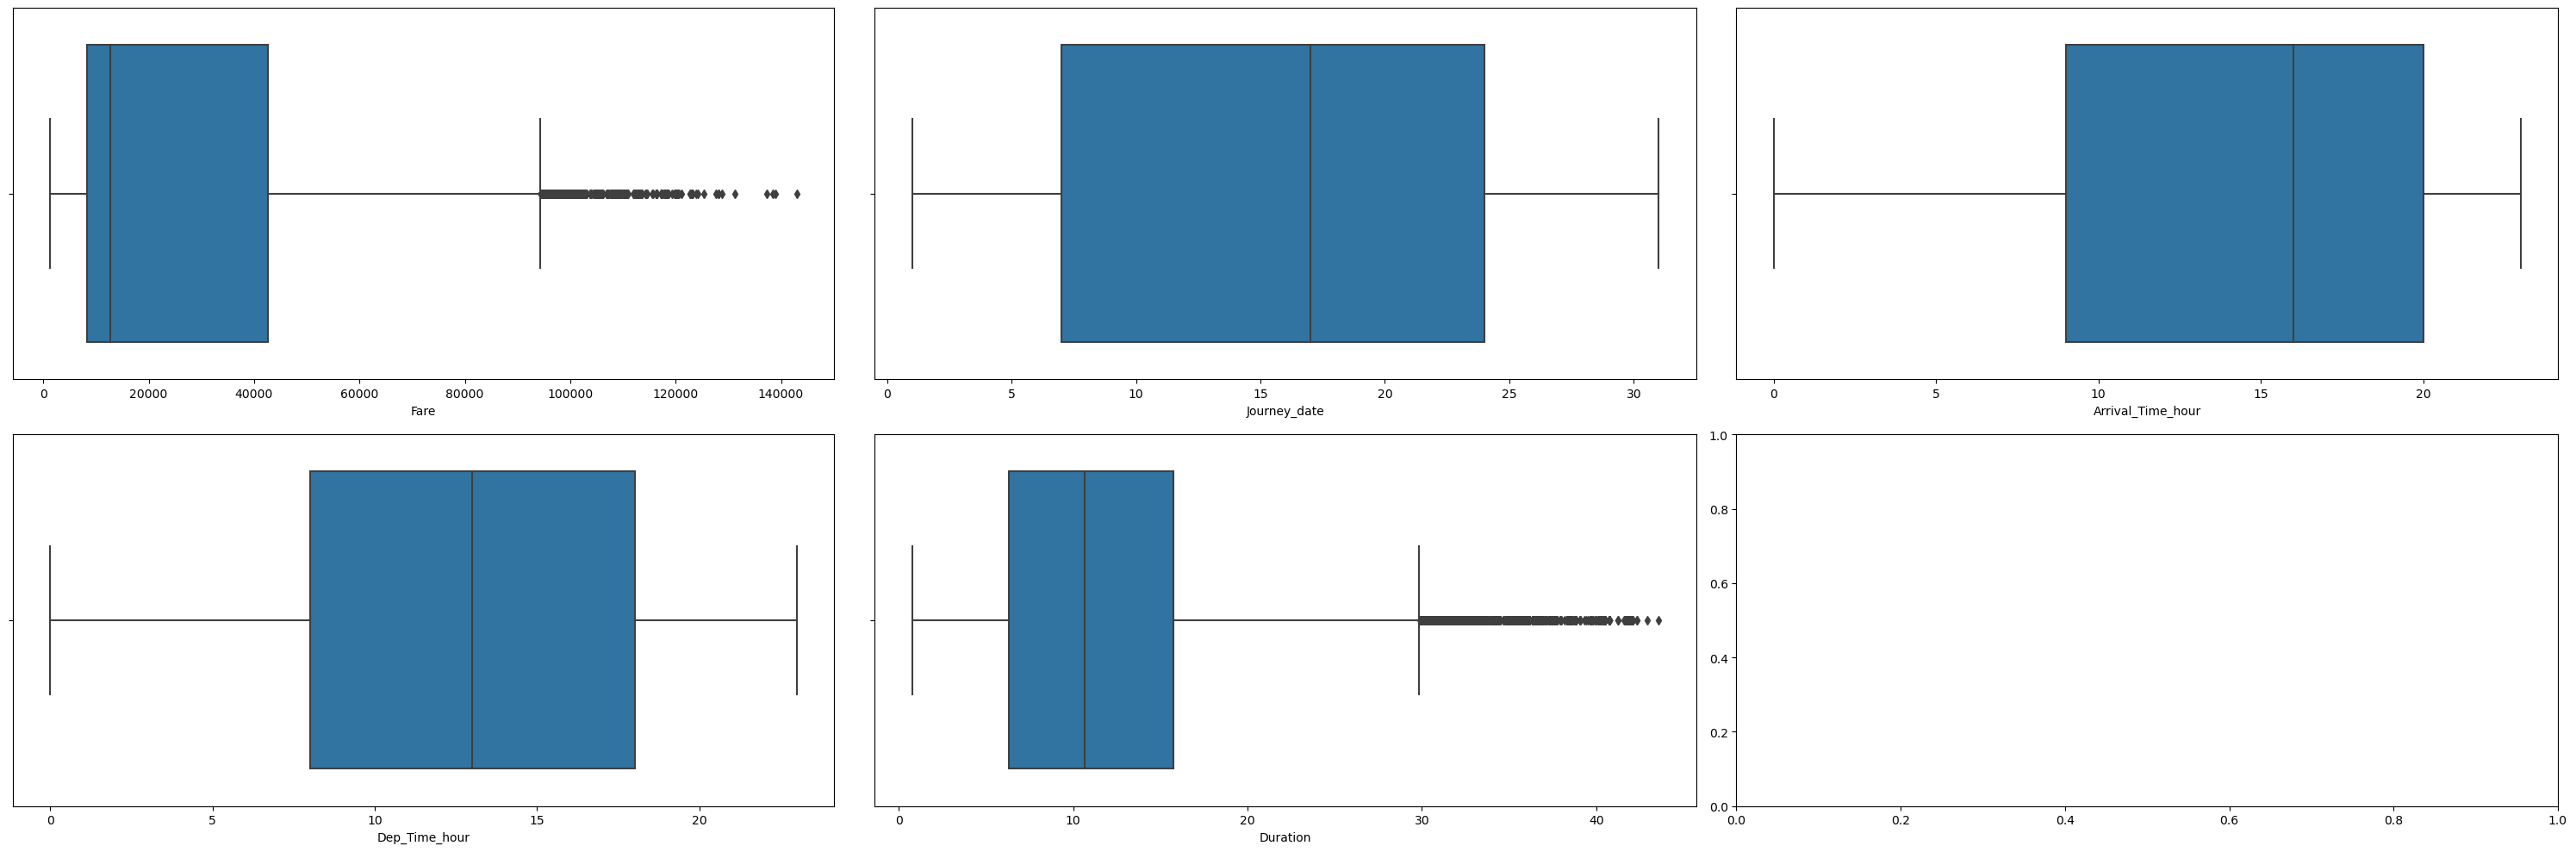

In [36]:
fig, axs = plt.subplots(2,3, figsize = (30,10))
plt1 = sns.boxplot(x= data['Fare'], ax = axs[0,0])
plt2 = sns.boxplot(x= data['Journey_date'], ax = axs[0,1])
plt3 = sns.boxplot(x= data['Arrival_Time_hour'], ax = axs[0,2])
plt1 = sns.boxplot(x= data['Dep_Time_hour'], ax = axs[1,0])
plt2 = sns.boxplot(x= data['Duration'], ax = axs[1,1])
plt.tight_layout()

<Axes: xlabel='Fare', ylabel='Density'>

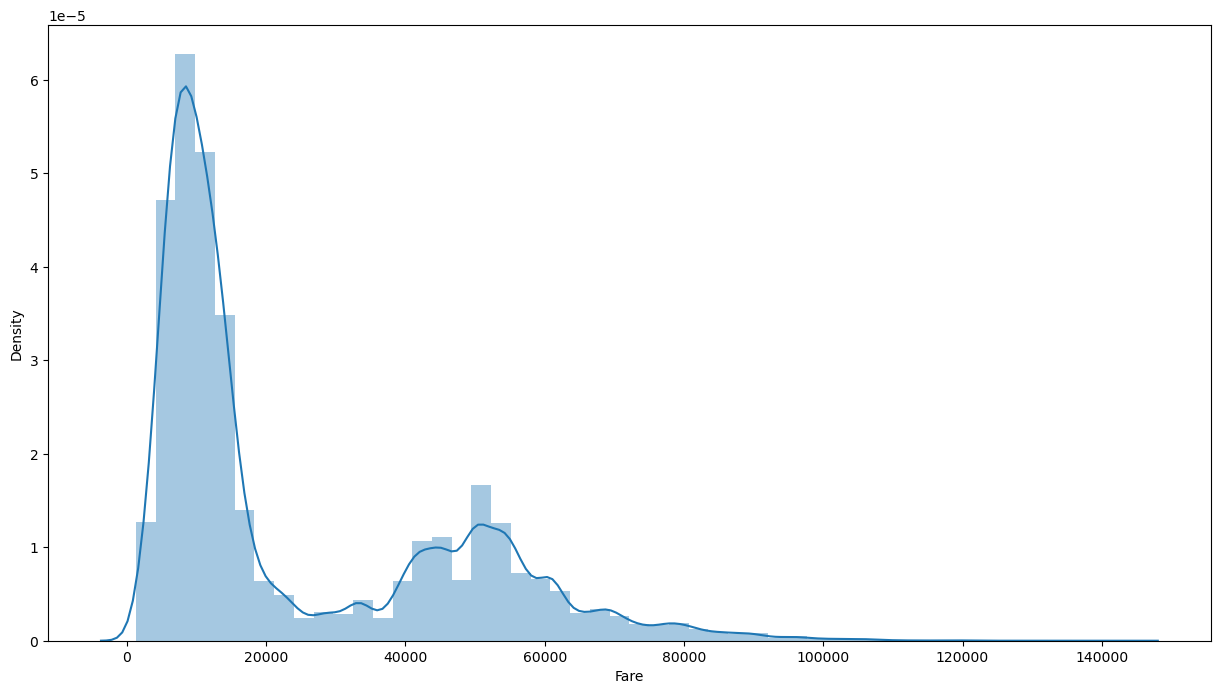

In [37]:
plt.figure(figsize=(15,8))
sns.distplot(df.Fare)

In [38]:
# Transform 'Fare' data into logarithmic scale
#df['Fare'] = np.log(df['Fare'])

# Plot the distribution of log-transformed 'Fare' data
#plt.figure(figsize=(15, 8))
#sns.distplot(df['Fare'])
#plt.xlabel('Logarithm of Fare')
#plt.title('Distribution of Log-Transformed Fare')
#plt.show()


In [39]:
df.head(2)

,Journey_day,Airline,Class,Total_stops,Duration,Days_left,Fare,Source,Destination,Journey_date,Dep_Time_hour,Arrival_Time_hour,depart,Arrival
0,Monday,SpiceJet,Economy,non-stop,2.0833,1,5335,Delhi,Mumbai,16,20,22,Evening,Night
1,Monday,Indigo,Economy,non-stop,2.3333,1,5899,Delhi,Mumbai,16,23,1,Night,late night


In [40]:
df = pd.get_dummies(df,columns = ['Total_stops','Journey_day','Airline','Class','Source','Destination','depart','Arrival'],drop_first = True,dtype=int)

In [41]:
df

,Duration,Days_left,Fare,Journey_date,Dep_Time_hour,Arrival_Time_hour,Total_stops_2+-stop,Total_stops_non-stop,Journey_day_Monday,Journey_day_Saturday,...,depart_Evening,depart_Morning,depart_Night,depart_Noon,depart_late night,Arrival_Evening,Arrival_Morning,Arrival_Night,Arrival_Noon,Arrival_late night
0,2.0833,1,5335,16,20,22,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,2.3333,1,5899,16,23,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,2.1667,1,5801,16,22,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2.0833,1,5794,16,18,20,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,2.1667,1,5955,16,20,22,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378860,11.2500,50,61302,6,5,16,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
378861,11.1667,50,65028,6,8,19,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
378862,13.0833,50,65028,6,6,19,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
378863,11.2500,50,69254,6,5,16,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X = df.drop('Fare',axis = 1)
Y=df['Fare']

In [43]:
X

,Duration,Days_left,Journey_date,Dep_Time_hour,Arrival_Time_hour,Total_stops_2+-stop,Total_stops_non-stop,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,...,depart_Evening,depart_Morning,depart_Night,depart_Noon,depart_late night,Arrival_Evening,Arrival_Morning,Arrival_Night,Arrival_Noon,Arrival_late night
0,2.0833,1,16,20,22,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2.3333,1,16,23,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2.1667,1,16,22,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.0833,1,16,18,20,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2.1667,1,16,20,22,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378860,11.2500,50,6,5,16,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
378861,11.1667,50,6,8,19,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
378862,13.0833,50,6,6,19,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
378863,11.2500,50,6,5,16,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [45]:
df_train=sc.fit_transform(X)
x = pd.DataFrame(df_train,columns=X.columns)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)


                  Feature        VIF
0                Duration   1.891529
1               Days_left   1.094872
2            Journey_date   1.159311
3           Dep_Time_hour  27.860908
4       Arrival_Time_hour  44.077266
5     Total_stops_2+-stop   1.100996
6    Total_stops_non-stop   1.482984
7      Journey_day_Monday   1.805455
8    Journey_day_Saturday   1.711970
9      Journey_day_Sunday   1.717135
10   Journey_day_Thursday   1.724784
11    Journey_day_Tuesday   1.761807
12  Journey_day_Wednesday   1.730923
13        Airline_AirAsia   1.213980
14       Airline_AkasaAir   1.087819
15    Airline_AllianceAir   1.013199
16       Airline_GO FIRST   1.146252
17         Airline_Indigo   1.918112
18       Airline_SpiceJet   1.067946
19        Airline_StarAir   1.002646
20        Airline_Vistara   1.431328
21          Class_Economy   1.276734
22       Source_Bangalore   2.418858
23         Source_Chennai   2.165081
24           Source_Delhi   2.606409
25       Source_Hyderabad   2.115813
2

In [48]:
x

,Duration,Days_left,Journey_date,Dep_Time_hour,Arrival_Time_hour,Total_stops_2+-stop,Total_stops_non-stop,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,...,depart_Evening,depart_Morning,depart_Night,depart_Noon,depart_late night,Arrival_Evening,Arrival_Morning,Arrival_Night,Arrival_Noon,Arrival_late night
0,-1.361149,-1.727900,-0.00171,1.255765,1.143271,-0.230612,2.659398,2.29446,-0.400868,-0.400123,...,1.750903,-0.512631,-0.330164,-0.443496,-0.12109,-0.617452,-0.476103,1.958397,-0.393083,-0.276716
1,-1.325735,-1.727900,-0.00171,1.800760,-2.137534,-0.230612,2.659398,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,3.028802,-0.443496,-0.12109,-0.617452,-0.476103,-0.510622,-0.393083,3.613812
2,-1.349335,-1.727900,-0.00171,1.619095,-2.293763,-0.230612,2.659398,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,3.028802,-0.443496,-0.12109,-0.617452,-0.476103,-0.510622,-0.393083,3.613812
3,-1.361149,-1.727900,-0.00171,0.892434,0.830814,-0.230612,2.659398,2.29446,-0.400868,-0.400123,...,1.750903,-0.512631,-0.330164,-0.443496,-0.12109,1.619559,-0.476103,-0.510622,-0.393083,-0.276716
4,-1.349335,-1.727900,-0.00171,1.255765,1.143271,-0.230612,2.659398,2.29446,-0.400868,-0.400123,...,1.750903,-0.512631,-0.330164,-0.443496,-0.12109,-0.617452,-0.476103,1.958397,-0.393083,-0.276716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374853,-0.062632,1.700523,-1.10224,-1.469215,0.205898,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109,-0.617452,-0.476103,-0.510622,2.543994,-0.276716
374854,-0.074432,1.700523,-1.10224,-0.924219,0.674585,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109,1.619559,-0.476103,-0.510622,-0.393083,-0.276716
374855,0.197066,1.700523,-1.10224,-1.287550,0.674585,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109,1.619559,-0.476103,-0.510622,-0.393083,-0.276716
374856,-0.062632,1.700523,-1.10224,-1.469215,0.205898,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,...,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109,-0.617452,-0.476103,-0.510622,2.543994,-0.276716


In [49]:
x = x.drop(['Dep_Time_hour','Arrival_Time_hour','Arrival_Evening','Arrival_Morning','Arrival_Night','Arrival_Noon','Arrival_late night'],axis=1)

In [50]:
x

,Duration,Days_left,Journey_date,Total_stops_2+-stop,Total_stops_non-stop,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,Journey_day_Tuesday,...,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,depart_Evening,depart_Morning,depart_Night,depart_Noon,depart_late night
0,-1.361149,-1.727900,-0.00171,-0.230612,2.659398,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,-0.384618,-0.463291,-0.39704,-0.377991,2.123339,1.750903,-0.512631,-0.330164,-0.443496,-0.12109
1,-1.325735,-1.727900,-0.00171,-0.230612,2.659398,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,-0.384618,-0.463291,-0.39704,-0.377991,2.123339,-0.571134,-0.512631,3.028802,-0.443496,-0.12109
2,-1.349335,-1.727900,-0.00171,-0.230612,2.659398,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,-0.384618,-0.463291,-0.39704,-0.377991,2.123339,-0.571134,-0.512631,3.028802,-0.443496,-0.12109
3,-1.361149,-1.727900,-0.00171,-0.230612,2.659398,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,-0.384618,-0.463291,-0.39704,-0.377991,2.123339,1.750903,-0.512631,-0.330164,-0.443496,-0.12109
4,-1.349335,-1.727900,-0.00171,-0.230612,2.659398,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,-0.384618,-0.463291,-0.39704,-0.377991,2.123339,1.750903,-0.512631,-0.330164,-0.443496,-0.12109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374853,-0.062632,1.700523,-1.10224,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,2.599983,-0.463291,-0.39704,-0.377991,-0.470956,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109
374854,-0.074432,1.700523,-1.10224,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,2.599983,-0.463291,-0.39704,-0.377991,-0.470956,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109
374855,0.197066,1.700523,-1.10224,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,2.599983,-0.463291,-0.39704,-0.377991,-0.470956,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109
374856,-0.062632,1.700523,-1.10224,-0.230612,-0.376025,2.29446,-0.400868,-0.400123,-0.406498,-0.403535,...,2.599983,-0.463291,-0.39704,-0.377991,-0.470956,-0.571134,-0.512631,-0.330164,-0.443496,-0.12109


In [51]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                  Feature       VIF
0                Duration  1.852400
1               Days_left  1.094701
2            Journey_date  1.159295
3     Total_stops_2+-stop  1.099237
4    Total_stops_non-stop  1.466483
5      Journey_day_Monday  1.805328
6    Journey_day_Saturday  1.711450
7      Journey_day_Sunday  1.716959
8    Journey_day_Thursday  1.724736
9     Journey_day_Tuesday  1.761624
10  Journey_day_Wednesday  1.730854
11        Airline_AirAsia  1.192790
12       Airline_AkasaAir  1.085658
13    Airline_AllianceAir  1.012786
14       Airline_GO FIRST  1.140107
15         Airline_Indigo  1.871807
16       Airline_SpiceJet  1.066060
17        Airline_StarAir  1.002467
18        Airline_Vistara  1.415547
19          Class_Economy  1.276007
20       Source_Bangalore  2.406333
21         Source_Chennai  2.160758
22           Source_Delhi  2.594558
23       Source_Hyderabad  2.113820
24         Source_Kolkata  2.163993
25          Source_Mumbai  2.504701
26  Destination_Bangalore  2

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)


In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
#r2 = lm.score(X_test, y_test);r2

In [55]:
from sklearn.metrics import r2_score
#r2 = r2_score(y_test, test_prediction);r2

In [56]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

print("MAE for training set:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE for training set:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE for training set:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 score for training set:", metrics.r2_score(y_train, y_pred_train))

print("MAE for testing set:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE for testing set:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE for testing set:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 score for testing set:", metrics.r2_score(y_test, y_pred_test))


MAE for training set: 5408.8864907069055
MSE for training set: 66665571.61816442
RMSE for training set: 8164.898751250037
R2 score for training set: 0.859201450212655
MAE for testing set: 5410.561184571787
MSE for testing set: 66973506.397442624
RMSE for testing set: 8183.734257503883
R2 score for testing set: 0.8597175599779705


In [58]:
lm.coef_

array([-1.97916136e+02, -1.96393467e+03,  1.32391784e+02,  5.28481547e+02,
       -3.09206368e+03,  3.79774556e+01,  4.24201336e+01,  1.68805573e+02,
       -8.55252535e+01, -1.30346882e+02,  1.58673062e+01, -4.64551721e+02,
        2.00342070e+02,  7.23647577e+01,  5.80207982e+01,  9.31901741e+01,
        8.40286282e+01,  7.46833691e+01,  1.99857407e+03, -1.89289974e+04,
        4.67829736e+02,  3.02133786e+02, -4.87910685e+02, -8.48331744e+01,
        1.41301933e+03,  3.62926890e+02,  1.05577255e+03,  9.94948535e+02,
        2.81377959e+02,  4.81889289e+02,  1.83926156e+03,  1.09022682e+03,
        3.52480142e+02,  3.56174275e+02,  1.13050523e+02,  1.88793760e+02,
        4.07727867e+01])

In [59]:
lm.intercept_

24142.836875312518

In [60]:
import statsmodels.api as sm

# Reset indices for X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Add constant to X_train
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.327e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:40:23   Log-Likelihood:            -2.7359e+06
No. Observations:              262400   AIC:                         5.472e+06
Df Residuals:                  262362   BIC:                         5.472e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.414e+

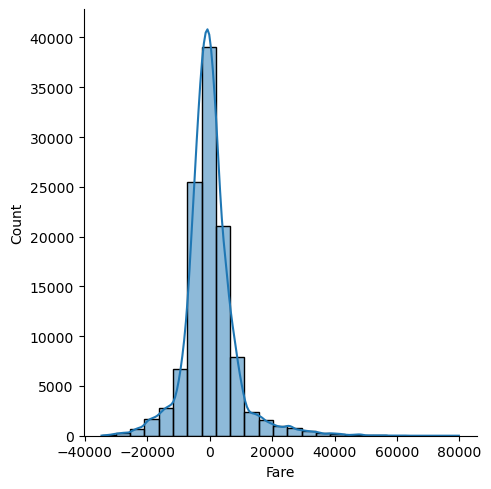

In [61]:
test_residuals = y_test - y_pred_test
sns.displot(test_residuals,bins=25,kde=True)

In [66]:
# Use the model to predict fare for a new flight
new_flight = [[4,25, 30, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,0,0, 1, 0, 0, 1, 0, 0, 0, 0]]

predicted_log_fare = lm.predict(new_flight)
print("Predicted Log Fare for the new flight:", predicted_log_fare)



Predicted Log Fare for the new flight: [-43872.17488509]


In [65]:
# Convert the log fare to actual fare
predicted_fare = np.exp(predicted_log_fare)
print("Predicted Fare for the new flight:", predicted_fare)

Predicted Fare for the new flight: [0.]
